In [104]:
%matplotlib notebook

In [105]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import numpy as np
import datetime as dt

In [106]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")

In [107]:
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month

In [108]:
housing_df2 = housing_df2[housing_df2.PRICE.notnull()]
residential_df = housing_df2.loc[housing_df2["SOURCE"] == "Residential"]

In [109]:
housing_df3 = residential_df[['BATHRM','WARD','BEDRM','HF_BATHRM','YEAR','PRICE']]
housing_df3 = housing_df3[~(housing_df3['YEAR'] < 2007.0)] 
housing_df3 = housing_df3[~(housing_df3['YEAR'] > 2017.0)]

In [110]:
two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
two_bed_one_bath_df = two_bed_one_bath[two_bed_one_bath['BEDRM'] == 2]
two_bed_one_bath_df2 = two_bed_one_bath_df[two_bed_one_bath_df['BATHRM'] == 1]
two_bed_one_bath_df3 = two_bed_one_bath_df2[two_bed_one_bath_df2['HF_BATHRM'] == 0]
two_bed_one_bath_avg = pd.DataFrame(two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
two_bed_one_bath_avg = two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
two_bed_two_bath_df = two_bed_two_bath[two_bed_two_bath['BEDRM'] == 2]
two_bed_two_bath_df2 = two_bed_two_bath_df[two_bed_two_bath_df['BATHRM'] == 2]
two_bed_two_bath_df3 = two_bed_two_bath_df2[two_bed_two_bath_df2['HF_BATHRM'] == 0]
two_bed_two_bath_avg = pd.DataFrame(two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
two_bed_two_bath_avg = two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
three_bed_two_bath_df = three_bed_two_bath[three_bed_two_bath['BEDRM'] == 3]
three_bed_two_bath_df2 = three_bed_two_bath_df[three_bed_two_bath_df['BATHRM'] == 2]
three_bed_two_bath_df3 = three_bed_two_bath_df2[three_bed_two_bath_df2['HF_BATHRM'] == 0]
three_bed_two_bath_avg = pd.DataFrame(three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
three_bed_two_bath_avg = three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
four_bed_two_bath_df = four_bed_two_bath[four_bed_two_bath['BEDRM'] == 4]
four_bed_two_bath_df2 = four_bed_two_bath_df[four_bed_two_bath_df['BATHRM'] == 2]
four_bed_two_bath_df3 = four_bed_two_bath_df2[four_bed_two_bath_df2['HF_BATHRM'] == 0]
four_bed_two_bath_avg = pd.DataFrame(four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
four_bed_two_bath_avg = four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 1']
four_bed_three_bath_df = four_bed_three_bath[four_bed_three_bath['BEDRM'] == 4]
four_bed_three_bath_df2 = four_bed_three_bath_df[four_bed_three_bath_df['BATHRM'] == 3]
four_bed_three_bath_df3 = four_bed_three_bath_df2[four_bed_three_bath_df2['HF_BATHRM'] == 0]
four_bed_three_bath_avg = pd.DataFrame(four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
four_bed_three_bath_avg = four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})

bed_bath_ward1_merge1 = two_bed_one_bath_avg.join(two_bed_two_bath_avg,how='left')
bed_bath_ward1_merge2 = bed_bath_ward1_merge1.join(three_bed_two_bath_avg,how='left')
bed_bath_ward1_merge3 = bed_bath_ward1_merge2.join(four_bed_two_bath_avg,how='left')
bed_bath_ward1_merge4 = bed_bath_ward1_merge3.join(four_bed_three_bath_avg,how='left')

bed_bath_ward1_merge4

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,374485.714286,422500.000000,590415.384615,513437.500000,648900.000000
2008.0,317800.000000,365000.000000,426279.166667,453077.700000,547375.000000
2009.0,346500.000000,441166.666667,422524.950000,366728.750000,501980.000000
2010.0,241333.333333,492466.666667,436948.571429,514132.444444,607737.500000
2011.0,423699.600000,437750.000000,430807.692308,480291.666667,583400.000000
2012.0,426175.000000,724900.000000,483008.350000,565275.625000,396666.333333
2013.0,482558.777778,516582.500000,553069.444444,519524.181818,659016.666667
2014.0,536857.142857,657285.714286,562304.518519,702965.500000,830411.666667
2015.0,632111.625000,691464.285714,665469.464286,848633.636364,884463.461538


In [111]:
percent_change_ward_1 = bed_bath_ward1_merge4.pct_change()*100
percent_change_ward_1

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,NaN,NaN,NaN,NaN,NaN
2008.0,-15.136950,-13.609467,-27.800126,-11.756017,-15.645708
2009.0,9.030837,20.867580,-0.880694,-19.058309,-8.293218
2010.0,-30.351130,11.628258,3.413673,40.194202,21.068070
2011.0,75.566133,-11.110735,-1.405401,-6.582113,-4.004607
2012.0,0.584235,65.596802,12.116928,17.694240,-32.007828
2013.0,13.230194,-28.737412,14.505152,-8.093652,66.138795
2014.0,11.252176,27.237317,1.669786,35.309486,26.007688
2015.0,17.742985,5.199957,18.346811,20.721947,6.509036


<IPython.core.display.Javascript object>


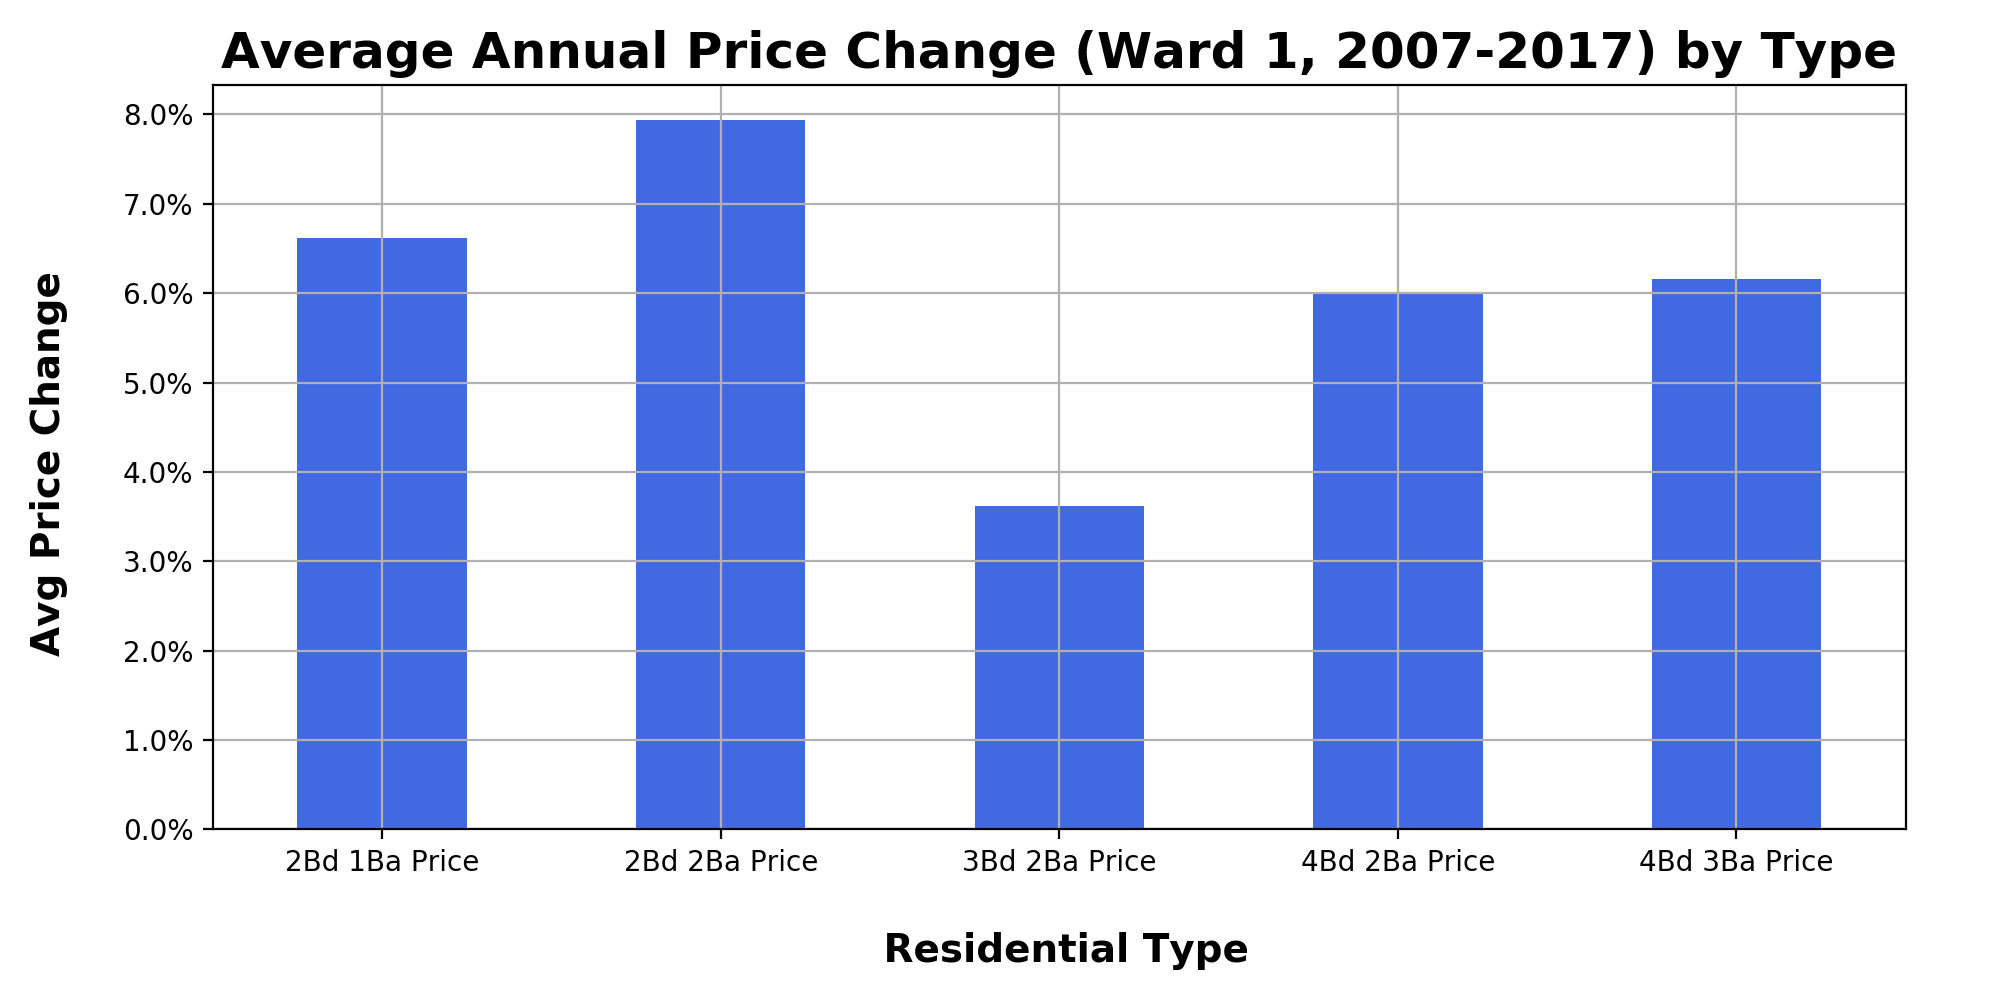

In [112]:
pct_ward1 = pd.DataFrame(percent_change_ward_1.mean())

pct_ward1.plot(kind='bar', figsize=(10,5), color='royalblue', legend=False)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.title("Average Annual Price Change (Ward 1, 2007-2017) by Type", fontsize=18, fontweight='bold')
plt.ylabel("Avg Price Change \n", fontsize=14, fontweight='bold')
plt.xlabel("\n Residential Type", fontsize=14, fontweight='bold', rotation='horizontal')
plt.xticks(rotation='horizontal')
plt.grid()
plt.tight_layout()

plt.show()
plt.savefig("NewImages/ward_1_pct_change.png")


In [113]:
ward_2_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_two_bed_one_bath_df = ward_2_two_bed_one_bath[ward_2_two_bed_one_bath['BEDRM'] == 2]
ward_2_two_bed_one_bath_df2 = ward_2_two_bed_one_bath_df[ward_2_two_bed_one_bath_df['BATHRM'] == 1]
ward_2_two_bed_one_bath_df3 = ward_2_two_bed_one_bath_df2[ward_2_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_2_two_bed_one_bath_avg = pd.DataFrame(ward_2_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_two_bed_one_bath_avg = ward_2_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_2_two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_two_bed_two_bath_df = ward_2_two_bed_two_bath[ward_2_two_bed_two_bath['BEDRM'] == 2]
ward_2_two_bed_two_bath_df2 = ward_2_two_bed_two_bath_df[ward_2_two_bed_two_bath_df['BATHRM'] == 2]
ward_2_two_bed_two_bath_df3 = ward_2_two_bed_two_bath_df2[ward_2_two_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_2_two_bed_two_bath_avg = pd.DataFrame(ward_2_two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_two_bed_two_bath_avg = ward_2_two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

ward_2_three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_three_bed_two_bath_df = ward_2_three_bed_two_bath[ward_2_three_bed_two_bath['BEDRM'] == 3]
ward_2_three_bed_two_bath_df2 = ward_2_three_bed_two_bath_df[ward_2_three_bed_two_bath_df['BATHRM'] == 2]
ward_2_three_bed_two_bath_df3 = ward_2_three_bed_two_bath_df2[ward_2_three_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_2_three_bed_two_bath_avg = pd.DataFrame(ward_2_three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_three_bed_two_bath_avg = ward_2_three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

ward_2_four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_four_bed_two_bath_df = ward_2_four_bed_two_bath[ward_2_four_bed_two_bath['BEDRM'] == 4]
ward_2_four_bed_two_bath_df2 = ward_2_four_bed_two_bath_df[ward_2_four_bed_two_bath_df['BATHRM'] == 2]
ward_2_four_bed_two_bath_df3 = ward_2_four_bed_two_bath_df2[ward_2_four_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_2_four_bed_two_bath_avg = pd.DataFrame(ward_2_four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_four_bed_two_bath_avg = ward_2_four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

ward_2_four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 2']
ward_2_four_bed_three_bath_df = ward_2_four_bed_three_bath[ward_2_four_bed_three_bath['BEDRM'] == 4]
ward_2_four_bed_three_bath_df2 = ward_2_four_bed_three_bath_df[ward_2_four_bed_three_bath_df['BATHRM'] == 3]
ward_2_four_bed_three_bath_df3 = ward_2_four_bed_three_bath_df2[ward_2_four_bed_three_bath_df2['HF_BATHRM'] == 0]
ward_2_four_bed_three_bath_avg = pd.DataFrame(ward_2_four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_2_four_bed_three_bath_avg = ward_2_four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})

bed_bath_ward2_merge1 = ward_2_two_bed_one_bath_avg.join(ward_2_two_bed_two_bath_avg,how='left')
bed_bath_ward2_merge2 = bed_bath_ward2_merge1.join(ward_2_three_bed_two_bath_avg,how='left')
bed_bath_ward2_merge3 = bed_bath_ward2_merge2.join(ward_2_four_bed_two_bath_avg,how='left')
bed_bath_ward2_merge4 = bed_bath_ward2_merge3.join(ward_2_four_bed_three_bath_avg,how='left')

bed_bath_ward2_merge4

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,474800.000000,799000.000000,7.990000e+05,8.112500e+05,9.582000e+05
2008.0,572500.000000,840000.000000,8.510800e+05,6.500000e+05,8.255000e+05
2009.0,601750.000000,905000.000000,7.421667e+05,8.250000e+05,NaN
2010.0,638069.230769,788886.000000,6.416250e+05,8.190000e+05,NaN
2011.0,652416.666667,808000.000000,1.108909e+06,NaN,1.243333e+06
2012.0,621200.000000,837200.000000,7.782500e+05,7.200000e+05,1.102143e+06
2013.0,730450.000000,845000.000000,8.671243e+05,9.400000e+05,1.707500e+06
2014.0,743833.333333,857040.000000,9.365714e+05,8.860000e+05,8.860000e+05
2015.0,692555.555556,961975.000000,1.074636e+06,9.685000e+05,1.436444e+06


In [114]:
percent_change_ward_2 = bed_bath_ward2_merge4.pct_change()*100
percent_change_ward_2

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,NaN,NaN,NaN,NaN,NaN
2008.0,20.577085,5.131414,6.518148,-19.876733,-13.848883
2009.0,5.109170,7.738095,-12.797074,26.923077,0.000000
2010.0,6.035601,-12.830276,-13.547047,-0.727273,0.000000
2011.0,2.248570,2.422910,72.828224,0.000000,50.615788
2012.0,-4.784775,3.613861,-29.818413,-12.087912,-11.355802
2013.0,17.586929,0.931677,11.419760,30.555556,54.925470
2014.0,1.832204,1.424852,8.008903,-5.744681,-48.111274
2015.0,-6.893719,12.243886,14.741528,9.311512,62.126912


<IPython.core.display.Javascript object>


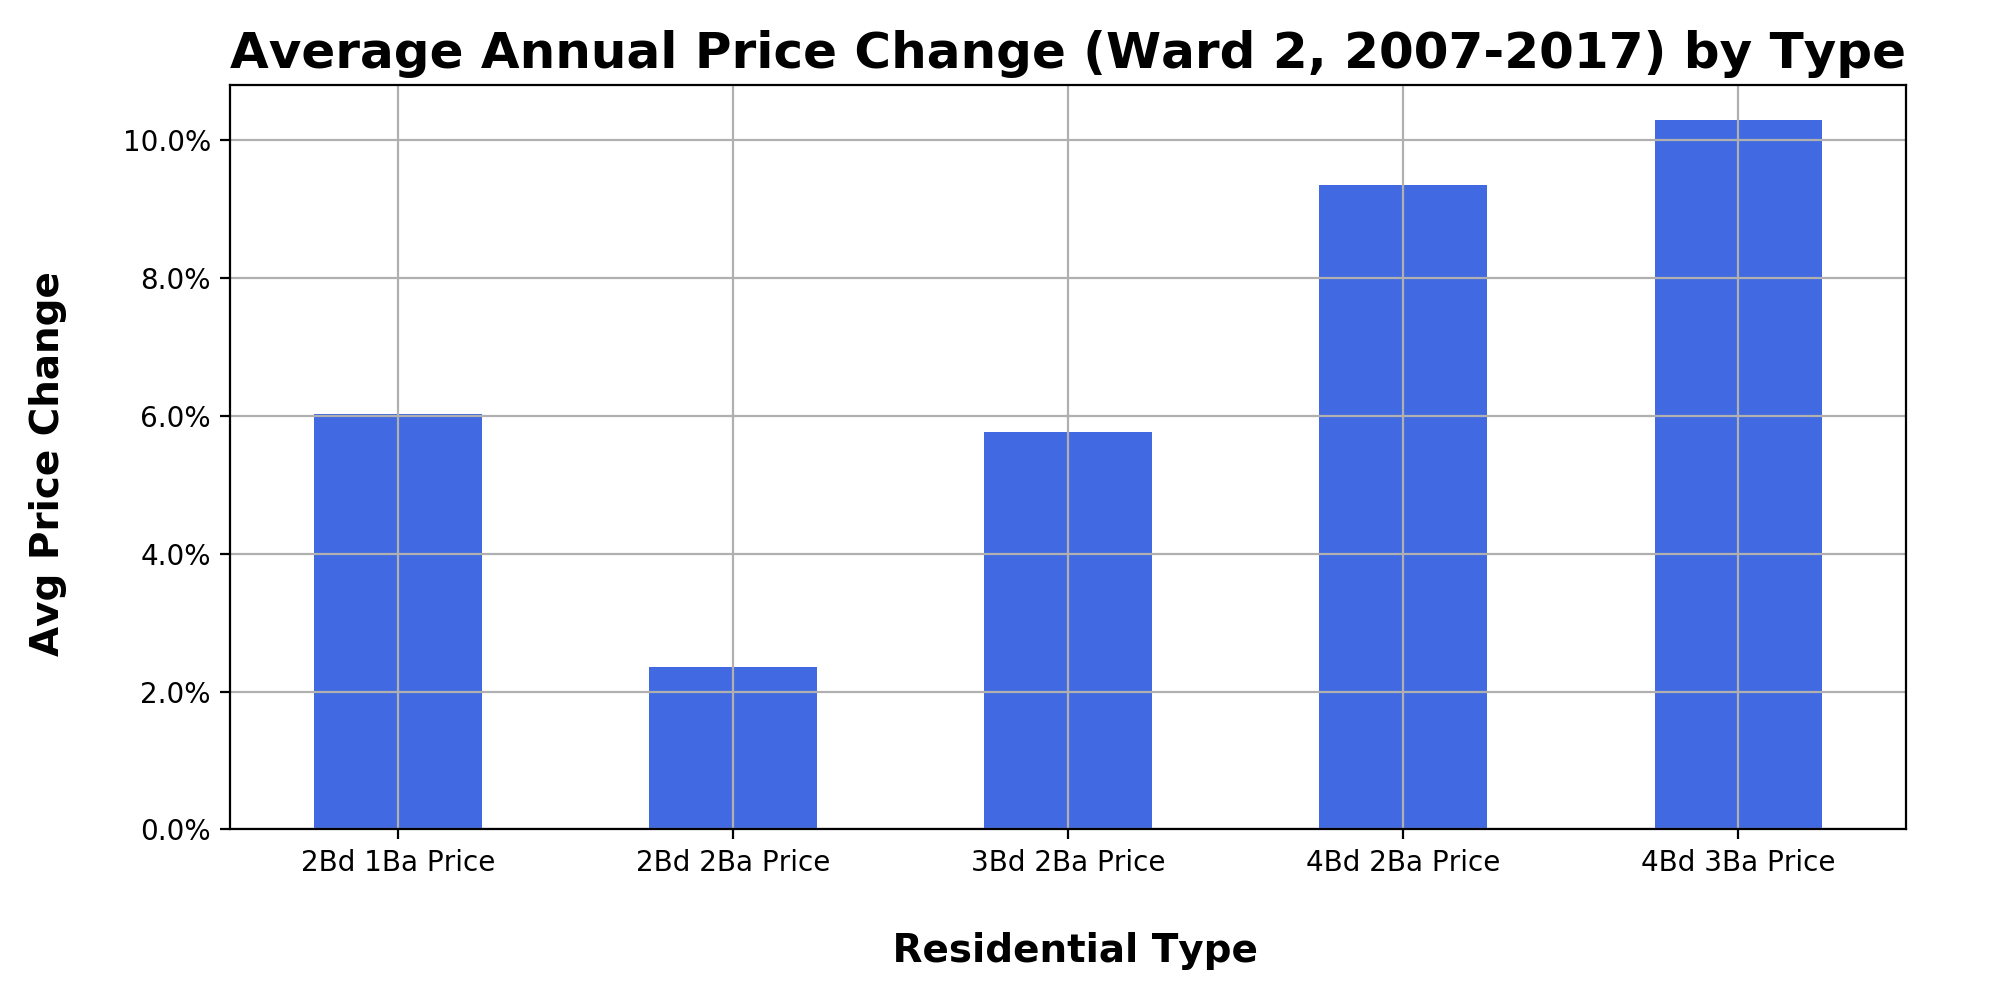

In [115]:
pct_ward2 = pd.DataFrame(percent_change_ward_2.mean())

pct_ward2.plot(kind='bar', figsize=(10,5), color='royalblue', legend=False)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.title("Average Annual Price Change (Ward 2, 2007-2017) by Type", fontsize=18, fontweight='bold')
plt.ylabel("Avg Price Change \n", fontsize=14, fontweight='bold')
plt.xlabel("\n Residential Type", fontsize=14, fontweight='bold', rotation='horizontal')
plt.xticks(rotation='horizontal')
plt.grid()
plt.tight_layout()

plt.show()
plt.savefig("NewImages/ward_2_pct_change.png")


In [116]:
ward_3_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_two_bed_one_bath_df = ward_3_two_bed_one_bath[ward_3_two_bed_one_bath['BEDRM'] == 2]
ward_3_two_bed_one_bath_df2 = ward_3_two_bed_one_bath_df[ward_3_two_bed_one_bath_df['BATHRM'] == 1]
ward_3_two_bed_one_bath_df3 = ward_3_two_bed_one_bath_df2[ward_3_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_3_two_bed_one_bath_avg = pd.DataFrame(ward_3_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_two_bed_one_bath_avg = ward_3_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_3_two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_two_bed_two_bath_df = ward_3_two_bed_two_bath[ward_3_two_bed_two_bath['BEDRM'] == 2]
ward_3_two_bed_two_bath_df2 = ward_3_two_bed_two_bath_df[ward_3_two_bed_two_bath_df['BATHRM'] == 2]
ward_3_two_bed_two_bath_df3 = ward_3_two_bed_two_bath_df2[ward_3_two_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_3_two_bed_two_bath_avg = pd.DataFrame(ward_3_two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_two_bed_two_bath_avg = ward_3_two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

ward_3_three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_three_bed_two_bath_df = ward_3_three_bed_two_bath[ward_3_three_bed_two_bath['BEDRM'] == 3]
ward_3_three_bed_two_bath_df2 = ward_3_three_bed_two_bath_df[ward_3_three_bed_two_bath_df['BATHRM'] == 2]
ward_3_three_bed_two_bath_df3 = ward_3_three_bed_two_bath_df2[ward_3_three_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_3_three_bed_two_bath_avg = pd.DataFrame(ward_3_three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_three_bed_two_bath_avg = ward_3_three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

ward_3_four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_four_bed_two_bath_df = ward_3_four_bed_two_bath[ward_3_four_bed_two_bath['BEDRM'] == 4]
ward_3_four_bed_two_bath_df2 = ward_3_four_bed_two_bath_df[ward_3_four_bed_two_bath_df['BATHRM'] == 2]
ward_3_four_bed_two_bath_df3 = ward_3_four_bed_two_bath_df2[ward_3_four_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_3_four_bed_two_bath_avg = pd.DataFrame(ward_3_four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_four_bed_two_bath_avg = ward_3_four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

ward_3_four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 3']
ward_3_four_bed_three_bath_df = ward_3_four_bed_three_bath[ward_3_four_bed_three_bath['BEDRM'] == 4]
ward_3_four_bed_three_bath_df2 = ward_3_four_bed_three_bath_df[ward_3_four_bed_three_bath_df['BATHRM'] == 3]
ward_3_four_bed_three_bath_df3 = ward_3_four_bed_three_bath_df2[ward_3_four_bed_three_bath_df2['HF_BATHRM'] == 0]
ward_3_four_bed_three_bath_avg = pd.DataFrame(ward_3_four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_3_four_bed_three_bath_avg = ward_3_four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})

bed_bath_ward3_merge1 = ward_3_two_bed_one_bath_avg.join(ward_3_two_bed_two_bath_avg,how='left')
bed_bath_ward3_merge2 = bed_bath_ward3_merge1.join(ward_3_three_bed_two_bath_avg,how='left')
bed_bath_ward3_merge3 = bed_bath_ward3_merge2.join(ward_3_four_bed_two_bath_avg,how='left')
bed_bath_ward3_merge4 = bed_bath_ward3_merge3.join(ward_3_four_bed_three_bath_avg,how='left')

bed_bath_ward3_merge4

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,637500.000000,712875.000000,710429.500000,775065.000000,1.001100e+06
2008.0,631333.333333,664650.000000,743739.411765,721928.571429,8.191250e+05
2009.0,614500.000000,709250.000000,808675.000000,820854.545455,8.911182e+05
2011.0,639900.000000,661750.000000,725185.185185,749877.777778,8.016071e+05
2012.0,706666.666667,696100.000000,709560.653846,845611.111111,9.029394e+05
2013.0,707000.000000,688500.000000,839153.260870,797266.578947,9.573681e+05
2014.0,694355.000000,746763.571429,874371.100000,824376.923077,9.659529e+05
2015.0,749000.000000,762214.285714,876402.500000,845000.000000,1.050007e+06
2016.0,592500.000000,796718.750000,888178.542857,920657.142857,1.079087e+06


In [117]:
percent_change_ward_3 = bed_bath_ward3_merge4.pct_change()*100
percent_change_ward_3

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,NaN,NaN,NaN,NaN,NaN
2008.0,-0.967320,-6.764861,4.688701,-6.855738,-18.177505
2009.0,-2.666315,6.710299,8.730960,13.703014,8.789035
2011.0,4.133442,-6.697215,-10.324273,-8.646692,-10.044800
2012.0,10.433922,5.190782,-2.154557,12.766525,12.641143
2013.0,0.047170,-1.091797,18.263781,-5.717112,6.027940
2014.0,-1.788543,8.462392,4.196830,3.400411,0.896714
2015.0,7.869894,2.069024,0.232327,2.501656,8.701633
2016.0,-20.894526,4.526872,1.343680,8.953508,2.769542


<IPython.core.display.Javascript object>


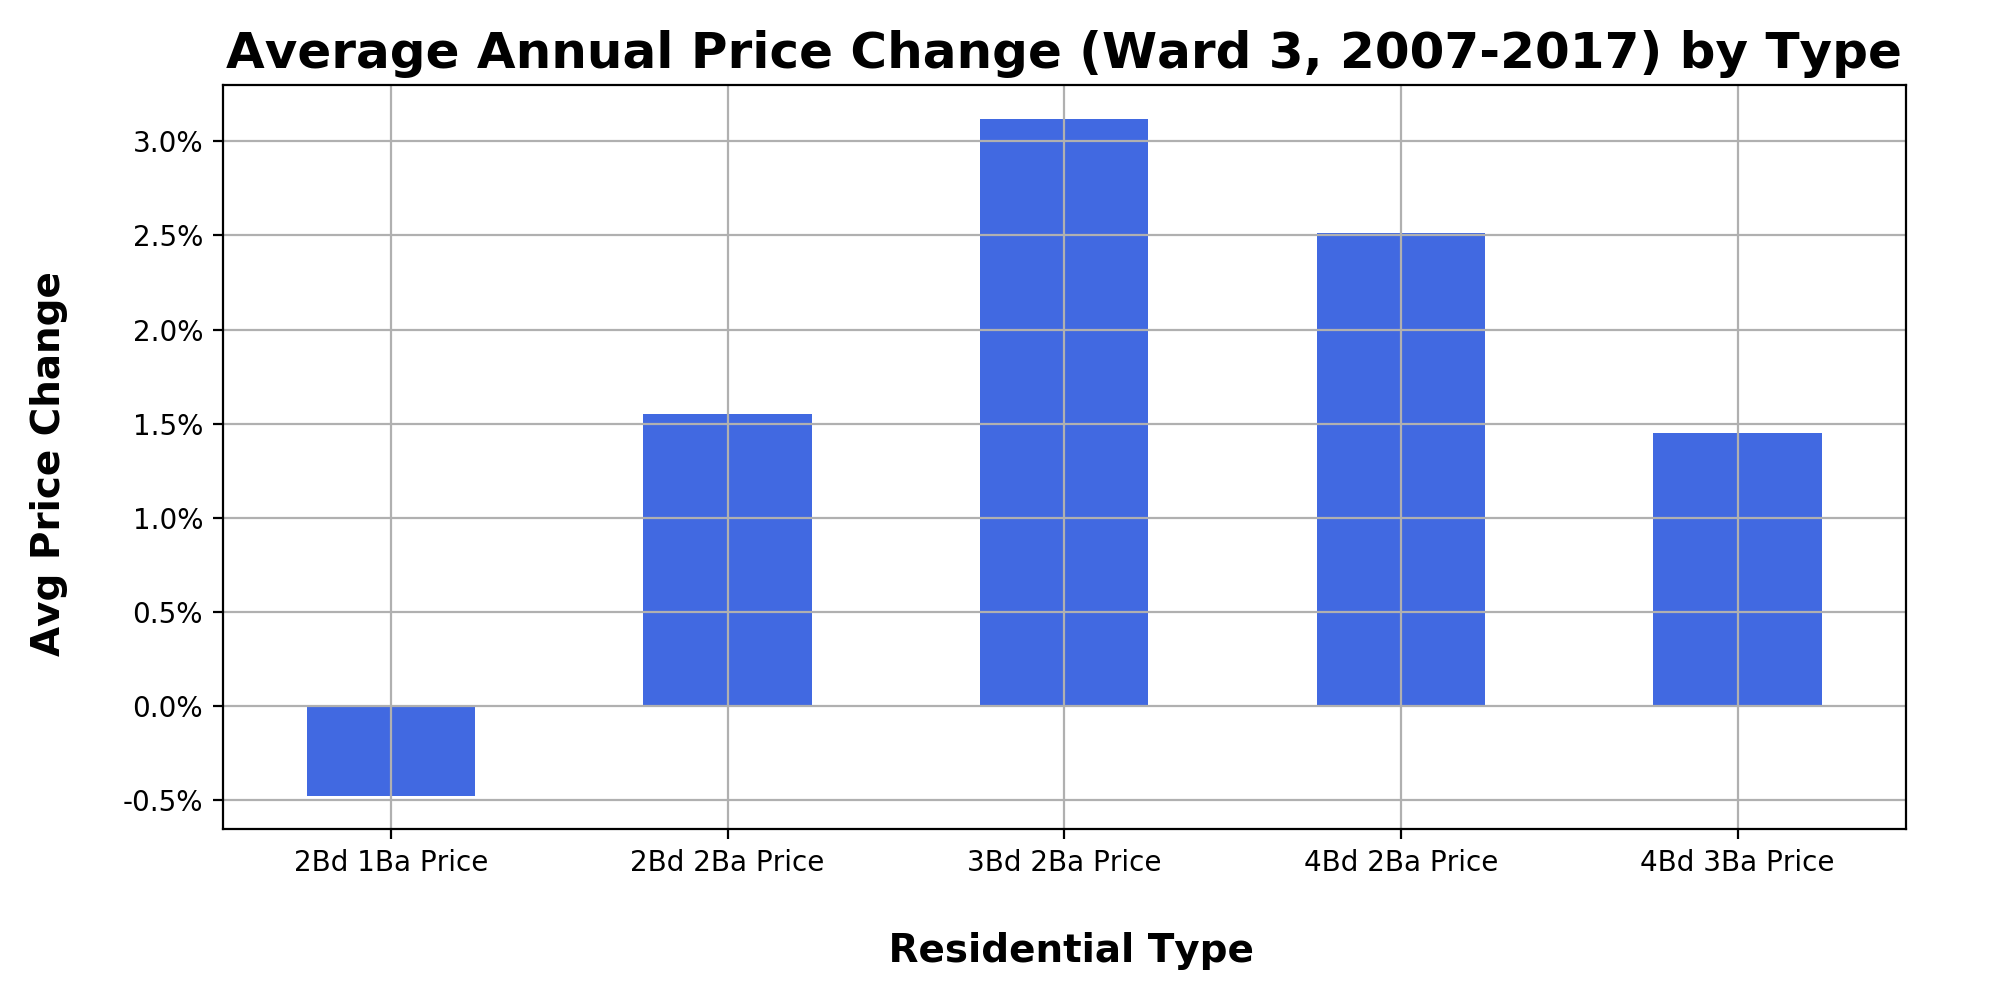

In [118]:
pct_ward3 = pd.DataFrame(percent_change_ward_3.mean())

pct_ward3.plot(kind='bar', figsize=(10,5), color='royalblue', legend=False)
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.title("Average Annual Price Change (Ward 3, 2007-2017) by Type", fontsize=18, fontweight='bold')
plt.ylabel("Avg Price Change \n", fontsize=14, fontweight='bold')
plt.xlabel("\n Residential Type", fontsize=14, fontweight='bold', rotation='horizontal')
plt.xticks(rotation='horizontal')
plt.grid()
plt.tight_layout()

plt.show()
plt.savefig("NewImages/ward_3_pct_change.png")


In [119]:
ward_4_two_bed_one_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_two_bed_one_bath_df = ward_4_two_bed_one_bath[ward_4_two_bed_one_bath['BEDRM'] == 2]
ward_4_two_bed_one_bath_df2 = ward_4_two_bed_one_bath_df[ward_4_two_bed_one_bath_df['BATHRM'] == 1]
ward_4_two_bed_one_bath_df3 = ward_4_two_bed_one_bath_df2[ward_4_two_bed_one_bath_df2['HF_BATHRM'] == 0]
ward_4_two_bed_one_bath_avg = pd.DataFrame(ward_4_two_bed_one_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_two_bed_one_bath_avg = ward_4_two_bed_one_bath_avg.rename(columns={'PRICE': '2Bd 1Ba Price'})

ward_4_two_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_two_bed_two_bath_df = ward_4_two_bed_two_bath[ward_4_two_bed_two_bath['BEDRM'] == 2]
ward_4_two_bed_two_bath_df2 = ward_4_two_bed_two_bath_df[ward_4_two_bed_two_bath_df['BATHRM'] == 2]
ward_4_two_bed_two_bath_df3 = ward_4_two_bed_two_bath_df2[ward_4_two_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_two_bed_two_bath_avg = pd.DataFrame(ward_4_two_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_two_bed_two_bath_avg = ward_4_two_bed_two_bath_avg.rename(columns={'PRICE': '2Bd 2Ba Price'})

ward_4_three_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_three_bed_two_bath_df = ward_4_three_bed_two_bath[ward_4_three_bed_two_bath['BEDRM'] == 3]
ward_4_three_bed_two_bath_df2 = ward_4_three_bed_two_bath_df[ward_4_three_bed_two_bath_df['BATHRM'] == 2]
ward_4_three_bed_two_bath_df3 = ward_4_three_bed_two_bath_df2[ward_4_three_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_three_bed_two_bath_avg = pd.DataFrame(ward_4_three_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_three_bed_two_bath_avg = ward_4_three_bed_two_bath_avg.rename(columns={'PRICE': '3Bd 2Ba Price'})

ward_4_four_bed_two_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_four_bed_two_bath_df = ward_4_four_bed_two_bath[ward_4_four_bed_two_bath['BEDRM'] == 4]
ward_4_four_bed_two_bath_df2 = ward_4_four_bed_two_bath_df[ward_4_four_bed_two_bath_df['BATHRM'] == 2]
ward_4_four_bed_two_bath_df3 = ward_4_four_bed_two_bath_df2[ward_4_four_bed_two_bath_df2['HF_BATHRM'] == 0]
ward_4_four_bed_two_bath_avg = pd.DataFrame(ward_4_four_bed_two_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_four_bed_two_bath_avg = ward_4_four_bed_two_bath_avg.rename(columns={'PRICE': '4Bd 2Ba Price'})

ward_4_four_bed_three_bath = housing_df3[housing_df3['WARD'] == 'Ward 4']
ward_4_four_bed_three_bath_df = ward_4_four_bed_three_bath[ward_4_four_bed_three_bath['BEDRM'] == 4]
ward_4_four_bed_three_bath_df2 = ward_4_four_bed_three_bath_df[ward_4_four_bed_three_bath_df['BATHRM'] == 3]
ward_4_four_bed_three_bath_df3 = ward_4_four_bed_three_bath_df2[ward_4_four_bed_three_bath_df2['HF_BATHRM'] == 0]
ward_4_four_bed_three_bath_avg = pd.DataFrame(ward_4_four_bed_three_bath_df3.groupby('YEAR')['PRICE'].mean())
ward_4_four_bed_three_bath_avg = ward_4_four_bed_three_bath_avg.rename(columns={'PRICE': '4Bd 3Ba Price'})

bed_bath_ward4_merge1 = ward_4_two_bed_one_bath_avg.join(ward_4_two_bed_two_bath_avg,how='left')
bed_bath_ward4_merge2 = bed_bath_ward4_merge1.join(ward_4_three_bed_two_bath_avg,how='left')
bed_bath_ward4_merge3 = bed_bath_ward4_merge2.join(ward_4_four_bed_two_bath_avg,how='left')
bed_bath_ward4_merge4 = bed_bath_ward4_merge3.join(ward_4_four_bed_three_bath_avg,how='left')

bed_bath_ward4_merge4

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,277272.000000,427000.000000,444675.925000,441323.529412,717666.666667
2008.0,302000.000000,320181.666667,407528.965517,455937.500000,624555.555556
2009.0,256337.500000,283925.000000,322678.826087,330499.944444,582121.777778
2010.0,230633.333333,395000.000000,364270.731707,444832.142857,566389.473684
2011.0,229966.666667,392000.000000,374306.944444,410768.750000,598171.428571
2012.0,217125.000000,270225.000000,417420.142857,502590.000000,605114.190476
2013.0,364083.333333,341400.000000,484679.021739,514462.125000,765082.352941
2014.0,332585.666667,448112.375000,524841.280000,540281.818182,676251.724138
2015.0,378714.142857,399020.000000,493460.816327,580100.000000,694773.750000


In [120]:
percent_change_ward_4 = bed_bath_ward4_merge4.pct_change()*100
percent_change_ward_4

,2Bd 1Ba Price,2Bd 2Ba Price,3Bd 2Ba Price,4Bd 2Ba Price,4Bd 3Ba Price
YEAR,,,,,
2007.0,NaN,NaN,NaN,NaN,NaN
2008.0,8.918318,-25.016003,-8.353715,3.311396,-12.974145
2009.0,-15.120033,-11.323780,-20.820640,-27.512007,-6.794236
2010.0,-10.027470,39.121247,12.889568,34.593712,-2.702580
2011.0,-0.289059,-0.759494,2.755152,-7.657584,5.611325
2012.0,-5.584143,-31.065051,11.518140,22.353514,1.160664
2013.0,67.683746,26.339162,16.112993,2.362189,26.436029
2014.0,-8.651225,31.257286,8.286362,5.018774,-11.610597
2015.0,13.869652,-10.955371,-5.979039,7.369891,2.738925


<IPython.core.display.Javascript object>


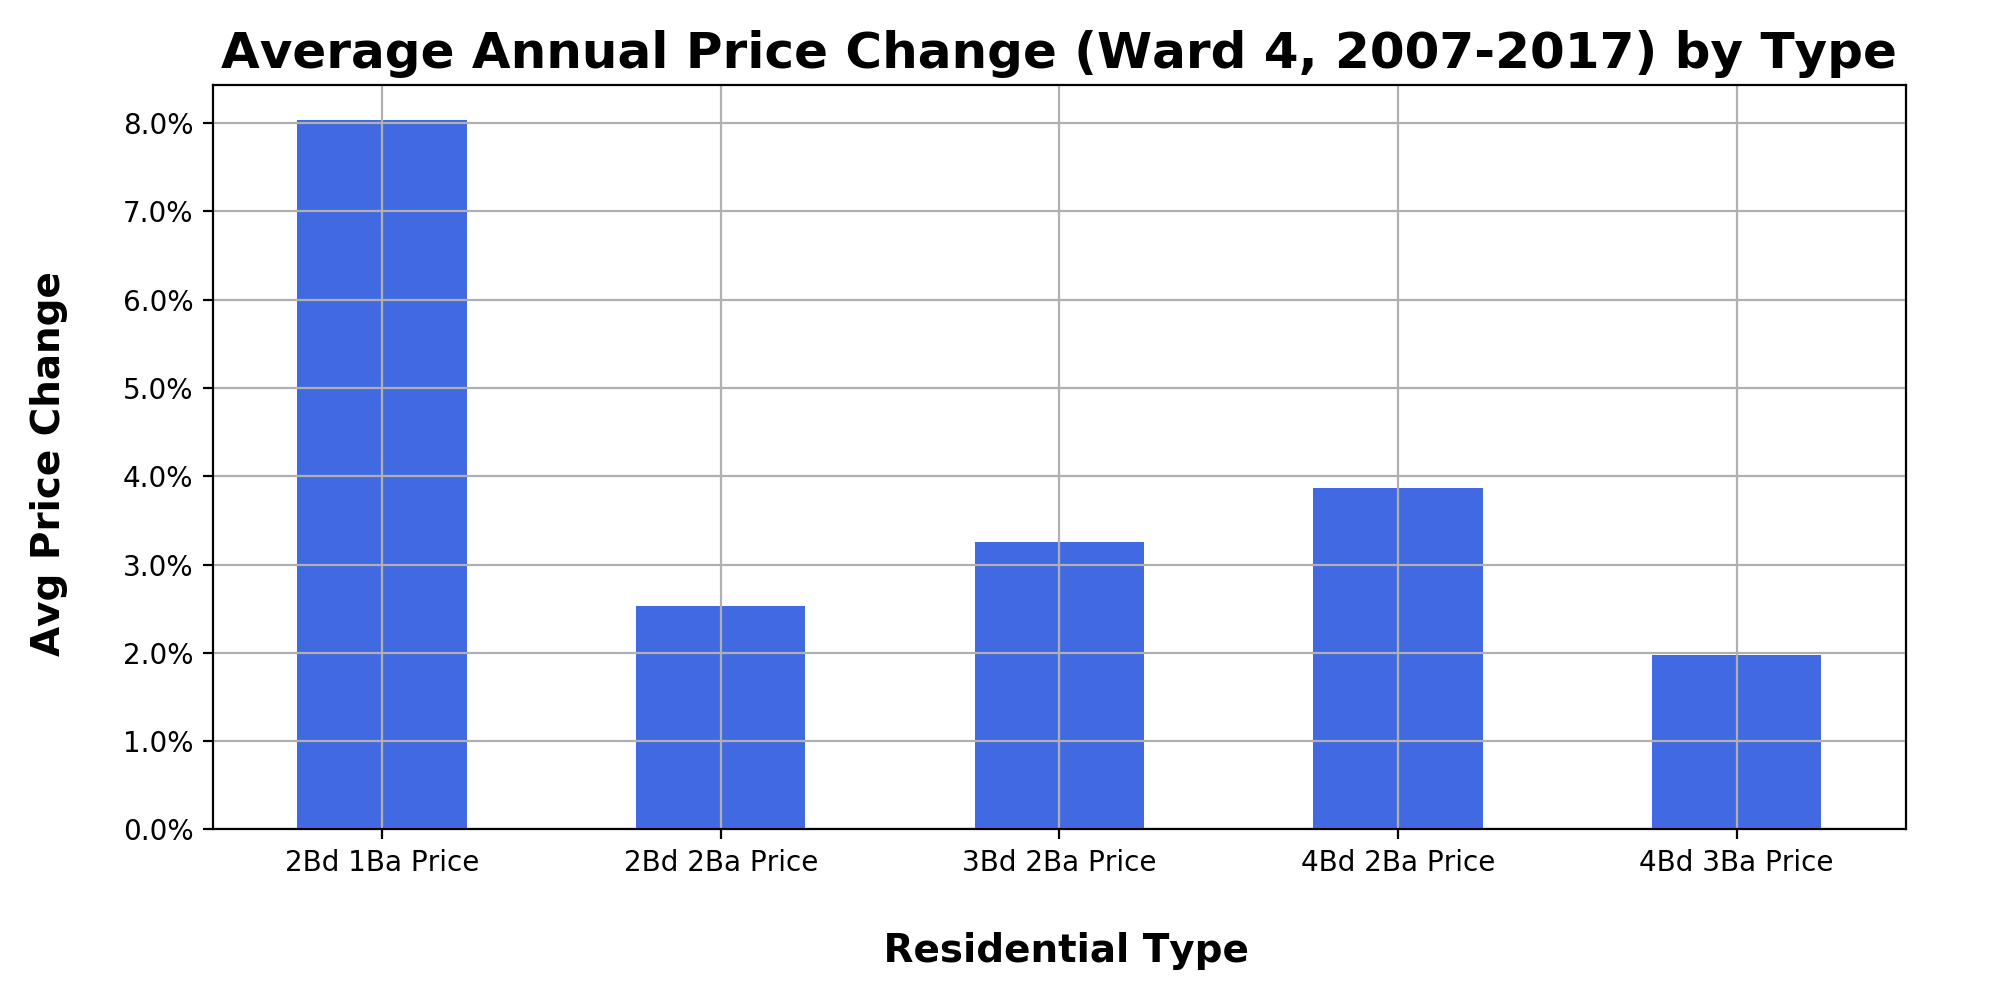

In [121]:
pct_ward4 = pd.DataFrame(percent_change_ward_4.mean())

pct_ward4.plot(kind='bar', figsize=(10,5), color='royalblue', legend=False)

plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.title("Average Annual Price Change (Ward 4, 2007-2017) by Type", fontsize=18, fontweight='bold')
plt.ylabel("Avg Price Change \n", fontsize=14, fontweight='bold')
plt.xlabel("\n Residential Type", fontsize=14, fontweight='bold', rotation='horizontal')
plt.xticks(rotation='horizontal')
plt.grid()
plt.tight_layout()

plt.show()
plt.savefig("NewImages/ward_4_pct_change.png")
